In [1]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive
#zip_path = '/content/drive/MyDrive/DatasetSnapZoo.zip'

# Path tujuan ekstraksi
#extract_path = '/content/'

# Ekstraksi file ZIP
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)

# Verifikasi hasil ekstraksi
#extracted_files = zipfile.ZipFile(zip_path, 'r').namelist()

#print("File berhasil diekstrak ke:", extract_path)
#print("Isi folder yang diekstrak:", extracted_files)


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.models import load_model

Saving tess3.jpeg to tess3 (1).jpeg
Saving tess2.jpeg to tess2 (1).jpeg
Saving tess1.jpeg to tess1 (1).jpeg
1/1 [==============================] - 2s 2s/step


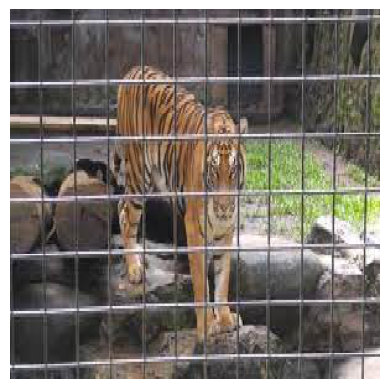

File: tess3.jpeg
Predicted class: harimau
Probability: 0.99999106
1/1 [==============================] - 0s 254ms/step


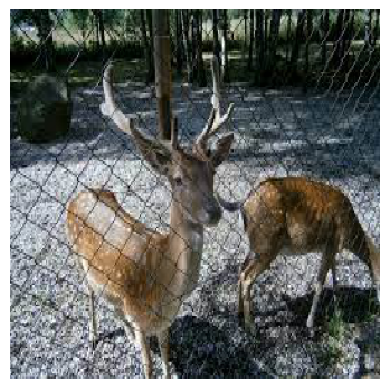

File: tess2.jpeg
Predicted class: rusa
Probability: 0.99960655
1/1 [==============================] - 0s 261ms/step


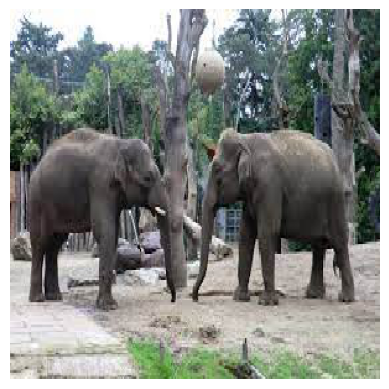

File: tess1.jpeg
Predicted class: gajah
Probability: 0.999602


In [4]:
# Memuat model h5
model_path = '/content/drive/MyDrive/ModelInceptionSnapZoo.h5'
model = tf.keras.models.load_model(model_path)

class_names = ['badak', 'gajah', 'harimau', 'jerapah', 'monyet', 'penguin', 'rusa', 'singa', 'ular', 'zebra']

# Mengupload gambar-gambar
uploaded_files = files.upload()

# Looping untuk setiap file gambar yang diupload
for image_path in uploaded_files.keys():
    # Load gambar dan lakukan preprocessing
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Melakukan prediksi menggunakan model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    probability = predictions[0][predicted_class_index]

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Menampilkan nama file, prediksi kelas, dan nilai probabilitas
    print('File:', image_path)
    print('Predicted class:', predicted_class)
    print('Probability:', probability)